# Natural Language Processing (NLP)

## Introduction
*Inspired by and adapted from [NLP Crash Course](http://files.meetup.com/7616132/DC-NLP-2013-09%20Charlie%20Greenbacker.pdf) by Charlie Greenbacker and [Introduction to NLP](http://spark-public.s3.amazonaws.com/nlp/slides/intro.pdf) by Dan Jurafsky*

### What is NLP?

- Natural Language Processing, a programmatic process using computers or the cloud to prepare, process, analyze, understand, and generate human language that occurs "in the wild" e.g. tweets, blog posts, emails etc. 
- Text data is UNstructured, it does not occur as tidy columns and rows
- Because speech is unstructured text. We need a way to make sense of it. 
- We can probabilistically model language with machines by converting language into 0s and 1s, thus rendering it in a form useable and understandable by machines

### How do we get computers to analyze spoken or written human language? 
- we represent the language as numerical features that we can then analyze. We do this because most algorithms expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.
- from the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction): 
    - **tokenizing:** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
    - **counting:** the occurrences of tokens in each document.
    - **normalizing and weighting:** with diminishing importance tokens that occur in the majority of samples / documents.



### What are some of the higher level task areas?

- **Information retrieval**: Find relevant results and similar results
    - [Google](https://www.google.com/)
- **Information extraction**: Structured information from unstructured documents
    - [Events from Gmail](https://support.google.com/calendar/answer/6084018?hl=en)
- **Machine translation**: One language to another
    - [Google Translate](https://translate.google.com/)
- **Text simplification**: Preserve the meaning of text, but simplify the grammar and vocabulary
    - [Rewordify](https://rewordify.com/)
    - [Simple English Wikipedia](https://simple.wikipedia.org/wiki/Main_Page)
- **Sentiment analysis**: Attitude of speaker
    - [Hater News](http://haternews.herokuapp.com/)
- **Automatic summarization**: Extractive or abstractive summarization
    - [autotldr](https://www.reddit.com/r/technology/comments/35brc8/21_million_people_still_use_aol_dialup/cr2zzj0)
- **Natural Language Generation**: Generate text from data
    - [How a computer describes a sports match](http://www.bbc.com/news/technology-34204052)
    - [Publishers withdraw more than 120 gibberish papers](http://www.nature.com/news/publishers-withdraw-more-than-120-gibberish-papers-1.14763)
- **Speech recognition and generation**: Speech-to-text, text-to-speech
    - [Google's Web Speech API demo](https://www.google.com/intl/en/chrome/demos/speech.html)
    - [Vocalware Text-to-Speech demo](https://www.vocalware.com/index/demo)
- **Question answering**: Determine the intent of the question, match query with knowledge base, evaluate hypotheses
    - [How did supercomputer Watson beat Jeopardy champion Ken Jennings?](http://blog.ted.com/how-did-supercomputer-watson-beat-jeopardy-champion-ken-jennings-experts-discuss/)
    - [IBM's Watson Trivia Challenge](http://www.nytimes.com/interactive/2010/06/16/magazine/watson-trivia-game.html)
    - [The AI Behind Watson](http://www.aaai.org/Magazine/Watson/watson.php)
- **Analyzing job descriptions to reach diverse candidates:** 
    - [Textio](https://textio.com/products/) 
- **Determining personality using text analytics:**
    - [via Facebook (no not cambridge analytica)](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791)
- **Diagnosing mental health using text analytics:**
    - [A relatively early application before the cloud. But a great example of using text analysis to agument human judgement and in a relatively "squishy" area--psychology](https://search.proquest.com/openview/0eb8bfa741f62292f1900dfecd011ed8/1?pq-origsite=gscholar&cbl=40661) 
- **Natural Languge Understanding:** training a machine to process (understand) what humans say. Realtime or otherwise. A good example of NLU is the [Google Assistant demo](https://www.theverge.com/2018/5/8/17332070/google-assistant-makes-phone-call-demo-duplex-io-2018)

### What are some of the lower level components?

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the. These are words with high frequency that introduce noise into the analysis. 
- **Stemming and lemmatization**: root word
- **TF-IDF**: word importance
- **Part-of-speech tagging**: noun/verb/adjective
- **Named entity recognition**: person/organization/location
- **Spelling correction**: "New Yrok City"
- **Word sense disambiguation**: "buy a mouse"
- **Segmentation**: "New York City subway"
- **Language detection**: "translate this page"

### Why is NLP hard?

- **Ambiguity**:
    - Hospitals are Sued by 7 Foot Doctors
    - Juvenile Court to Try Shooting Defendant
    - Local High School Dropouts Cut in Half
- **Non-standard English**: text messages
- **Idioms**: "throw in the towel"
- **Newly coined words**: "retweet"
- **Tricky entity names**: "Where is A Bug's Life playing?"
- **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"

In short, humans are good at handling mispronunciations, "improper" grammar, swapped words, contractions, colloquialisms, puns, and other variations etc. 

Machines are not. They are still toasters (drew carey points if you get that reference!)...much less capable of working with unpredictable inputs.

## Part 1: Reading in the Yelp Reviews

- "corpus" = collection of documents
- "corpora" = plural form of corpus

#### we need to install some packages
conda install -c https://conda.anaconda.org/sloria textblob

OR 
conda install -c conda-forge textblob 

cona install nltk

We also need to install some existing text corpora from nltk

In [1]:
import nltk
#nltk.download()
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\joweave\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [6]:
!pip install vaderSentiment --no-cache-dir --upgrade 
#https://github.com/cjhutto/vaderSentiment
'''original paper is here: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf 
it's worth noting they compared it to LIWC which is a well curated hand selected lexicon based dataset, while not strictly sentiment based, 
LIWC has been shown to be useful for a variety of social science applications from resume classification to mental health diagnostics '''

The system cannot find the path specified.


"original paper is here: http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf \nit's worth noting they compared it to LIWC which is a well curated hand selected lexicon based dataset, while not strictly sentiment based, \nLIWC has been shown to be useful for a variety of social science applications from resume classification to mental health diagnostics "

In [4]:
#let's import the topic model visualization package 
!pip install pyLDAvis --no-cache-dir --upgrade

  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97715 sha256=d9d9e0f79139a01b5f14828c7a3dbd7619a506adc0ba50fb2c31732424153a45
  Stored in directory: C:\Users\joweave\AppData\Local\Temp\pip-ephem-wheel-cache-l3yhdrrw\wheels\98\71\24\513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


The system cannot find the path specified.


In [2]:
!pip install textblob --no-cache-dir --upgrade

The system cannot find the path specified.


In [8]:
import pandas as pd
import numpy as np
import scipy as sp
import os

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#set this to ensure floats are not represented in scientific notation 
pd.set_option('display.float_format', lambda x: '%.18f' % x)

#ML algorithm and text analytics imports
from sklearn.model_selection import train_test_split
#CountVectorizer, and TfidfVectorizer are what we will use to "convert text into numbers we can work with"
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#these packages we will use for topic modeling
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
import concurrent.futures
from sklearn.manifold import TSNE

#text analytics 
import nltk
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import pyLDAvis.sklearn #used to visualize topic models

#data viz imports and Plotly based imports for visualization
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import matplotlib.style as style
style.use('fivethirtyeight')
# from plotly import tools
# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.figure_factory as ff

In [3]:
os.getcwd()

'C:\\Users\\joweave\\Downloads'

In [12]:
# read yelp.csv into a DataFrame
path = 'C:\\Users\\joweave\\Downloads\\'
data = 'yelp.csv'
yelp = pd.read_csv(path+data)

# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

#look at first few top rows
yelp_best_worst.head()

# define X and y
X = yelp_best_worst.text
y = yelp_best_worst.stars

#get column and row count and look at first few rows of the text data
X.shape
X.head

#look at the first few top rows of the label/dv 
y.head

# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4


(4086,)

<bound method NDFrame.head of 0       My wife took me here on my birthday for breakf...
1       I have no idea why some people give bad review...
3       Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4       General Manager Scott Petello is a good egg!!!...
6       Drop what you're doing and drive here. After I...
                              ...                        
9990    Yes I do rock the hipster joints.  I dig this ...
9991    Only 4 stars? \r\n\r\n(A few notes: The folks ...
9992    I'm not normally one to jump at reviewing a ch...
9994    Let's see...what is there NOT to like about Su...
9999    4-5 locations.. all 4.5 star average.. I think...
Name: text, Length: 4086, dtype: object>

<bound method NDFrame.head of 0       5
1       5
3       5
4       5
6       5
       ..
9990    5
9991    5
9992    5
9994    5
9999    5
Name: stars, Length: 4086, dtype: int64>

In [13]:
#this lets us print out the contents of an entire cell
pd.set_option('display.max_colwidth', -1) 

#lets look at a review
print(yelp_best_worst.text[:1])

0    My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.\r\n\r\nAnyway, I can't wait to go back!
Name: text, dtype: object


## Part 2: Tokenization

- **What:** breakdown text into component parts
- **Why:** allows you to make unstructured data, structured and text data must be structured for analysis

In [14]:
#let's look at the vector options we can set
vect = CountVectorizer() #instantiate CountVectorizer

In [15]:
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Let's take a look at the [CountVectorizer documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [16]:
# use CountVectorizer to create document-term matrices from X_train and X_test

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

**[fit_transform](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer.fit_transform)**: Learn the vocabulary dictionary and return term-document matrix.

In [17]:
'''
Rows are documents (i.e. comments, tweets, blogs etc.), columns are terms (aka "tokens" or "features"). This creates a
wide and extremely sparse dataframe or document term matrix. 
''' 
X_train_dtm.shape

'\nRows are documents (i.e. comments, tweets, blogs etc.), columns are terms (aka "tokens" or "features"). This creates a\nwide and extremely sparse dataframe or document term matrix. \n'

(3064, 16825)

In [18]:
# print first and last 50 features
print('first 50 features aka ngrams:    ' + str(vect.get_feature_names()[:50]))

print('last 50 features aka ngrams:    ' + str(vect.get_feature_names()[-50:]))

first 50 features aka ngrams:    ['00', '000', '00a', '00am', '00pm', '01', '02', '03', '03342', '04', '05', '06', '07', '09', '0buxoc0crqjpvkezo3bqog', '0l', '10', '100', '1000', '1000x', '1001', '100th', '101', '102', '105', '1070', '108', '10am', '10ish', '10min', '10mins', '10minutes', '10pm', '10th', '10x', '11', '110', '1100', '111', '111th', '112', '115th', '118', '11a', '11am', '11p', '11pm', '12', '120', '128i']
last 50 features aka ngrams:    ['yyyyy', 'z11', 'za', 'zabba', 'zach', 'zam', 'zanella', 'zankou', 'zappos', 'zatsiki', 'zen', 'zero', 'zest', 'zexperience', 'zha', 'zhou', 'zia', 'zihuatenejo', 'zilch', 'zin', 'zinburger', 'zinburgergeist', 'zinc', 'zinfandel', 'zing', 'zip', 'zipcar', 'zipper', 'zippers', 'zipps', 'ziti', 'zoe', 'zombi', 'zombies', 'zone', 'zones', 'zoning', 'zoo', 'zoyo', 'zucca', 'zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [19]:
# don't convert to lowercase
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(3064, 20838)

In [20]:
# last 50 features
print(vect.get_feature_names()[-50:])

['youthful', 'youtube', 'yow', 'yr', 'yrs', 'yu', 'yuck', 'yucky', 'yuk', 'yukon', 'yum', 'yumm', 'yummie', 'yummier', 'yumminess', 'yummm', 'yummmm', 'yummmmmmers', 'yummmmy', 'yummy', 'yumness', 'yup', 'yuppies', 'yuuuuummmmmyyy', 'yuyuyummy', 'yuzu', 'yyyyy', 'za', 'zen', 'zero', 'zest', 'zhou', 'zilch', 'zinc', 'zing', 'zip', 'zipper', 'ziti', 'zone', 'zones', 'zoning', 'zoo', 'zucchini', 'zuchinni', 'zupa', 'zwiebel', 'zzed', 'École', 'éclairs', 'ém']


- Parameter **ngram_range:** tuple (min_n, max_n)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.

In [21]:
# create a set of unigrams, bigrams, and trigrams
vect1 = CountVectorizer(ngram_range=(1,1)) #unigrams
vect2 = CountVectorizer(ngram_range=(1,2)) #bigrams
vect3 = CountVectorizer(ngram_range=(1,3)) #trigrams

X_train_dtm1 = vect1.fit_transform(X_train)
X_train_dtm2 = vect2.fit_transform(X_train)
X_train_dtm3 = vect3.fit_transform(X_train)

In [22]:
X_train_dtm1.shape

(3064, 16825)

In [23]:
X_train_dtm2.shape

(3064, 169847)

In [24]:
X_train_dtm3.shape

(3064, 456398)

In [25]:
# last 10 features of unigrams
print(vect1.get_feature_names()[-10:])

['zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [26]:
# last 10 features of bigrams 
print(vect2.get_feature_names()[-10:])


['zwiebel', 'zwiebel kräuter', 'zzed', 'zzed in', 'éclairs', 'éclairs napoleons', 'école', 'école lenôtre', 'ém', 'ém all']


In [27]:
# last 10 features of trigrams 
print(vect3.get_feature_names()[-10:])

['zzed in my', 'éclairs', 'éclairs napoleons', 'éclairs napoleons and', 'école', 'école lenôtre', 'école lenôtre trained', 'ém', 'ém all', 'ém all they']


## Part 3: Predicting the star rating

In [28]:
# use default options for CountVectorizer
vect = CountVectorizer()

# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use a Support Vector Machine to predict the star rating
from sklearn import svm
svm = svm.SVC(gamma=0.001, C=1)
svm.fit(X_train_dtm, y_train)
y_pred_class = svm.predict(X_test_dtm)

# calculate accuracy
print('Accuracy of a SVM with gamma of 0.001 and C of 1:', metrics.accuracy_score(y_test, y_pred_class))

print('F1 score of a SVM with gamma of 0.001 and C of 1:',metrics.f1_score(y_test, y_pred_class)) 

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Accuracy of a SVM with gamma of 0.001 and C of 1: 0.8737769080234834
F1 score of a SVM with gamma of 0.001 and C of 1: 0.4941176470588236


In [29]:
# calculate null accuracy
y_test_category = pd.DataFrame(np.where(y_test==5, 'best', 'worst'), columns = ['rating'])
y_test_category.rating.value_counts() / len(y_test_category.rating) 
#calculate the average of each category, all thing absent the mean is the most basic way to model a set of data

best    0.819960861056751478
worst   0.180039138943248522
Name: rating, dtype: float64

In [30]:
# define a function that accepts a vectorizer and calculates precision 
#Recall that precision answers the question: What proportion of positive identifications was actually correct?
#Represented as: True Positives/(True Positives + False Positives)
#great link: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

from sklearn import svm

def tokenize_test(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    clf = svm.SVC(gamma=0.001, C=1)
    clf.fit(X_train_dtm, y_train)
    y_pred_class = clf.predict(X_test_dtm)
    print('Precision: ', metrics.precision_score(y_test, y_pred_class))

In [31]:
vect = CountVectorizer()
tokenize_test(vect)

Features:  16825
Precision:  0.8873239436619719


In [32]:
# include unigrams, default for CountVectorizer()
vect1 = CountVectorizer(ngram_range=(0, 1))
tokenize_test(vect1)
print(vect.get_feature_names()[-10:])

Features:  16825
Precision:  0.8873239436619719
['zucchini', 'zuchinni', 'zumba', 'zupa', 'zuzu', 'zwiebel', 'zzed', 'éclairs', 'école', 'ém']


In [33]:
# include bigrams
vect2 = CountVectorizer(ngram_range=(1, 2))
tokenize_test(vect2)
print(vect2.get_feature_names()[-10:])

Features:  169847
Precision:  0.8985507246376812
['zwiebel', 'zwiebel kräuter', 'zzed', 'zzed in', 'éclairs', 'éclairs napoleons', 'école', 'école lenôtre', 'ém', 'ém all']


In [34]:
# include trigrams
vect3 = CountVectorizer(ngram_range=(1, 3))
tokenize_test(vect3)
print(vect3.get_feature_names()[-10:])

Features:  456398
Precision:  0.9137931034482759
['zzed in my', 'éclairs', 'éclairs napoleons', 'éclairs napoleons and', 'école', 'école lenôtre', 'école lenôtre trained', 'ém', 'ém all', 'ém all they']


In [35]:
# include groups of 4 words
vect4 = CountVectorizer(ngram_range=(1, 4))
tokenize_test(vect4)
print(vect4.get_feature_names()[-10:])

Features:  786270
Precision:  0.92
['éclairs napoleons and', 'éclairs napoleons and new', 'école', 'école lenôtre', 'école lenôtre trained', 'école lenôtre trained almond', 'ém', 'ém all', 'ém all they', 'ém all they were']


## Part 3: Stopword Removal

- **What:** Remove common words that will likely appear in any text
- **Why:** They don't tell you much about your text

In [36]:
# show vectorizer options
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used. max_df can be set to a value in the range [0.7, 1.0) to automatically detect and filter stop words based on intra corpus document frequency of terms.

In [37]:
# remove English stop words and let's try predicting star ratings again 
vect_stop = CountVectorizer(stop_words='english', ngram_range=(1, 4))
tokenize_test(vect_stop)
print(vect_stop.get_feature_names()[-10:])

Features:  470364
Precision:  0.8636363636363636
['éclairs napoleons new', 'éclairs napoleons new york', 'école', 'école lenôtre', 'école lenôtre trained', 'école lenôtre trained almond', 'ém', 'ém huge', 'ém huge ended', 'ém huge ended taking']


In [38]:
# hmmm seems like the stop words didn't do much let's check again, this time without removing stop words  
vect_no_stop = CountVectorizer(stop_words=None, ngram_range=(1, 4))
tokenize_test(vect_no_stop)
print(vect_no_stop.get_feature_names()[-10:])

Features:  786270
Precision:  0.92
['éclairs napoleons and', 'éclairs napoleons and new', 'école', 'école lenôtre', 'école lenôtre trained', 'école lenôtre trained almond', 'ém', 'ém all', 'ém all they', 'ém all they were']


#### So in this case, removing stop words is reducing our precision, although you could make the argument it's over fitting...what do you think? Why might we removing stop words reduce precision? 
Likely because stop words (listed below) are encoding important information about a review and because reviews are so short stopword usage actually becomes an important signal (see work by Pennebaker for more info on these kinds of words)

In [39]:
# set of stop words from sklearn 
print(vect_stop.get_stop_words())

frozenset({'for', 'thick', 'anyhow', 'thereafter', 'becoming', 'to', 'but', 'keep', 'toward', 'off', 'had', 'among', 'latter', 'him', 'and', 'mostly', 'see', 'wherever', 'move', 'without', 'itself', 'whom', 'few', 'five', 'never', 'was', 'along', 'our', 'his', 'more', 'indeed', 'well', 'seeming', 'give', 'on', 'twenty', 'ten', 'i', 'already', 'only', 'co', 'everything', 'onto', 'after', 'thereby', 'into', 'ours', 'forty', 'beyond', 'whereby', 'ourselves', 'amoungst', 'first', 'sometimes', 'seem', 'mine', 'other', 'inc', 'become', 'formerly', 'third', 'about', 'my', 'there', 'fire', 'elsewhere', 'otherwise', 'somewhere', 'eight', 'anything', 'whatever', 'would', 'besides', 'must', 'also', 'bottom', 'together', 'she', 'system', 'sometime', 'though', 'or', 'where', 'others', 'show', 'three', 'should', 'towards', 'latterly', 'hence', 'one', 'please', 'once', 'whole', 'have', 'thru', 'might', 'two', 'across', 'found', 'amongst', 'could', 'former', 'next', 'whereupon', 'many', 'therein', 'wh

## Part 4: Other CountVectorizer Options

- **max_features:** int or None, default=None
- If not None, build a vocabulary that only consider the top max_features ordered by **term frequency** across the corpus. Term frequency is the number of times the term appears in the corpus. Thus if it takes the first 100 features then it's taking the first 100 most frequently occuring bigrams/trigrams etc. 

In [40]:
# remove English stop words and only keep 100 features
vect_max100 = CountVectorizer(stop_words='english', max_features=100)
tokenize_test(vect_max100)
print(vect_max100.get_feature_names()) #[0:100]

Features:  100
Precision:  0.8888888888888888
['amazing', 'area', 'atmosphere', 'awesome', 'bad', 'bar', 'best', 'better', 'big', 'came', 'cheese', 'chicken', 'clean', 'coffee', 'come', 'day', 'definitely', 'delicious', 'did', 'didn', 'dinner', 'don', 'eat', 'excellent', 'experience', 'favorite', 'feel', 'food', 'free', 'fresh', 'friendly', 'friends', 'going', 'good', 'got', 'great', 'happy', 'home', 'hot', 'hour', 'just', 'know', 'like', 'little', 'll', 'location', 'long', 'looking', 'lot', 'love', 'lunch', 'make', 'meal', 'menu', 'minutes', 'need', 'new', 'nice', 'night', 'order', 'ordered', 'people', 'perfect', 'phoenix', 'pizza', 'place', 'pretty', 'prices', 'really', 'recommend', 'restaurant', 'right', 'said', 'salad', 'sandwich', 'sauce', 'say', 'service', 'staff', 'store', 'sure', 'table', 'thing', 'things', 'think', 'time', 'times', 'took', 'town', 'tried', 'try', 've', 'wait', 'want', 'way', 'went', 'wine', 'work', 'worth', 'years']


In [41]:
# repeat with bigrams, and limit the number of features to 100,000, recall the previous features was approx `170K
vect_tri_100k = CountVectorizer(ngram_range=(1, 2), max_features=100000)
tokenize_test(vect_tri_100k)
print(vect_tri_100k.get_feature_names()[0:100]) 

Features:  100000
Precision:  0.9014084507042254
['00', '00 25', '00 am', '00 amazing', '00 and', '00 at', '00 before', '00 bill', '00 can', '00 charge', '00 cover', '00 credit', '00 did', '00 each', '00 entree', '00 etc', '00 everyday', '00 extra', '00 food', '00 for', '00 gift', '00 here', '00 minimum', '00 night', '00 off', '00 on', '00 pair', '00 per', '00 pm', '00 price', '00 really', '00 seating', '00 seriously', '00 seven', '00 that', '00 the', '00 there', '00 they', '00 this', '00 though', '00 tip', '00 was', '00 we', '00 wish', '00 with', '000', '000 at', '000 in', '000 miles', '000 people', '000 thats', '000 they', '00a', '00a and', '00am', '00am 00pm', '00am before', '00am the', '00am then', '00am you', '00pm', '00pm and', '00pm information', '00pm my', '00pm oops', '00pm the', '01', '01 04', '01 16', '01 the', '02', '02 2010', '03', '03 pm', '03342', '03342 cents', '04', '04 2012', '05', '05 few', '05 minutes', '06', '06 hyundai', '07', '07 09', '07 after', '07 am', '07 ll'

In [42]:
# include bigrams, and limit the number of features 30,000
vect_tri_30k = CountVectorizer(ngram_range=(1, 2), max_features=30000)
tokenize_test(vect_tri_30k)
print(vect_tri_30k.get_feature_names()[0:100])

Features:  30000
Precision:  0.9054054054054054
['00', '00 am', '00 and', '00 for', '00 the', '000', '000 miles', '00am', '00pm', '01', '07', '09', '10', '10 000', '10 15', '10 30', '10 and', '10 bucks', '10 different', '10 for', '10 min', '10 minutes', '10 or', '10 they', '10 times', '10 years', '100', '100 to', '1000', '101', '10am', '10min', '10th', '11', '11 18', '110', '11am', '11pm', '12', '12 30', '12 and', '12 for', '12 hours', '12 years', '120', '12oz', '13', '13 years', '14', '14 99', '140', '15', '15 20', '15 different', '15 for', '15 min', '15 mins', '15 minutes', '15 years', '150', '16', '160', '17', '17 years', '18', '18 for', '180', '19', '1980', '1st', '1st time', '20', '20 00', '20 for', '20 min', '20 minutes', '20 off', '20 people', '20 per', '20 times', '20 years', '200', '2006', '2008', '2009', '2010', '2011', '2012', '20th', '21', '22', '23', '24', '24 hours', '24th', '25', '25 and', '25 for', '25 off', '250']


### What I find interesting here is that both of these cases at least 100 of the features are years or numbers likely having to do with wait times or time of day or cost. 

CountVectorizer parameter: 
- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary ignore terms that have a document frequency lower than a given threshold. This value. If float, the parameter represents a proportion of documents, integer absolute counts.

In [43]:
# include bigrams, and only include terms that appear at least 2 times
vect_min2 = CountVectorizer(ngram_range=(1, 2),  max_features=30000, min_df=2)
tokenize_test(vect_min2)
print(vect_min2.get_feature_names()[-50:])

Features:  30000
Precision:  0.9054054054054054
['your super', 'your table', 'your taste', 'your teeth', 'your time', 'your to', 'your tongue', 'your typical', 'your waist', 'your wallet', 'your way', 'your whole', 'yours', 'yourself', 'yourself and', 'yourself favor', 'yourself in', 'yourself the', 'yourself with', 'yourself you', 'yr', 'yr old', 'yrs', 'yuck', 'yucky', 'yukon', 'yukon gold', 'yum', 'yum and', 'yum the', 'yum yum', 'yumm', 'yummm', 'yummy', 'yummy and', 'yummy the', 'yummy too', 'yummy we', 'yung', 'yup', 'zach', 'zen', 'zero', 'zero stars', 'zinburger', 'zoe', 'zone', 'zoo', 'zucchini', 'zumba']


In [44]:
# include bigrams, and only include terms that appear at least 5 times
vect_min5 = CountVectorizer(ngram_range=(1, 2),  max_features=30000, min_df=5)
tokenize_test(vect_min5)
print(vect_min5.get_feature_names()[-50:])
#note that there are not 30K bigrams that match the min_df constraint
#also note that the precision increased to .906

Features:  14113
Precision:  0.9066666666666666
['young', 'your', 'your average', 'your body', 'your business', 'your car', 'your choice', 'your customers', 'your dog', 'your experience', 'your eyes', 'your face', 'your favorite', 'your first', 'your food', 'your friends', 'your guests', 'your hair', 'your hand', 'your hands', 'your job', 'your life', 'your looking', 'your meal', 'your mind', 'your money', 'your mouth', 'your name', 'your order', 'your own', 'your place', 'your table', 'your taste', 'your time', 'your tongue', 'your typical', 'your way', 'yourself', 'yourself favor', 'yourself with', 'yuck', 'yum', 'yum yum', 'yummy', 'yummy and', 'yup', 'zen', 'zero', 'zinburger', 'zucchini']


## Part 5: TextBlob for simplified text processing

In [45]:
# print the first review
print(yelp_best_worst.text[0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [46]:
review1 = TextBlob(yelp_best_worst.text[0])

In [47]:
# list the words
review1.words

WordList(['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excellent', 'The', 'weather', 'was', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'grounds', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'was', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fills', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'was', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'was', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'looks', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'eggs', 

In [48]:
# list the sentences
review1.sentences

[Sentence("My wife took me here on my birthday for breakfast and it was excellent."),
 Sentence("The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure."),
 Sentence("Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning."),
 Sentence("It looked like the place fills up pretty quickly so the earlier you get here the better."),
 Sentence("Do yourself a favor and get their Bloody Mary."),
 Sentence("It was phenomenal and simply the best I've ever had."),
 Sentence("I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it."),
 Sentence("It was amazing."),
 Sentence("While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious."),
 Sentence("It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete."),
 Sentence("It was the best "toast" I've ever had."),


In [49]:
# some string methods are available
review1.lower()

TextBlob("my wife took me here on my birthday for breakfast and it was excellent.  the weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  our waitress was excellent and our food arrived quickly on the semi-busy saturday morning.  it looked like the place fills up pretty quickly so the earlier you get here the better.

do yourself a favor and get their bloody mary.  it was phenomenal and simply the best i've ever had.  i'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  it was amazing.

while everything on the menu looks excellent, i had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  it came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  it was the best "toast" i've ever had.

anyway, i can't wait to go back!")

## Part 6: Stemming and Lemmatization

**Stemming:**

- **What:** Reduce a word to its base/stem/root form
- **Why:** Often makes sense to treat related words the same way
- **Notes:**
    - Uses a "simple" and fast rule-based approach
    - Stemmed words are usually not shown to users (used for analysis/indexing)
    - Some search engines treat words with the same stem as synonyms

In [50]:
# initialize stemmer
stemmer = SnowballStemmer('english')

# stem each word
print([stemmer.stem(word) for word in review1.words])

['my', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'was', 'excel', 'the', 'weather', 'was', 'perfect', 'which', 'made', 'sit', 'outsid', 'overlook', 'their', 'ground', 'an', 'absolut', 'pleasur', 'our', 'waitress', 'was', 'excel', 'and', 'our', 'food', 'arriv', 'quick', 'on', 'the', 'semi-busi', 'saturday', 'morn', 'it', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretti', 'quick', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'bloodi', 'mari', 'it', 'was', 'phenomen', 'and', 'simpli', 'the', 'best', 'i', 've', 'ever', 'had', 'i', "'m", 'pretti', 'sure', 'they', 'onli', 'use', 'ingredi', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'it', 'was', 'amaz', 'while', 'everyth', 'on', 'the', 'menu', 'look', 'excel', 'i', 'had', 'the', 'white', 'truffl', 'scrambl', 'egg', 'veget', 'skillet', 'and', 'it', 'was', 'tasti', 'and', 'delic

**Lemmatization**

- **What:** Derive the canonical form ('lemma') of a word
- **Why:** Can be better than stemming
- **Notes:** Uses a dictionary-based approach (slower than stemming)

In [51]:
# assume every word is a noun
print([word.lemmatize() for word in review1.words])

['My', 'wife', 'took', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'wa', 'excellent', 'The', 'weather', 'wa', 'perfect', 'which', 'made', 'sitting', 'outside', 'overlooking', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'wa', 'excellent', 'and', 'our', 'food', 'arrived', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'looked', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'wa', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'had', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredient', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'wa', 'amazing', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'had', 'the', 'white', 'truffle', 'scrambled', 'egg', 'vegetable', 'skill

In [52]:
# assume every word is a verb
print([word.lemmatize(pos='v') for word in review1.words])

['My', 'wife', 'take', 'me', 'here', 'on', 'my', 'birthday', 'for', 'breakfast', 'and', 'it', 'be', 'excellent', 'The', 'weather', 'be', 'perfect', 'which', 'make', 'sit', 'outside', 'overlook', 'their', 'ground', 'an', 'absolute', 'pleasure', 'Our', 'waitress', 'be', 'excellent', 'and', 'our', 'food', 'arrive', 'quickly', 'on', 'the', 'semi-busy', 'Saturday', 'morning', 'It', 'look', 'like', 'the', 'place', 'fill', 'up', 'pretty', 'quickly', 'so', 'the', 'earlier', 'you', 'get', 'here', 'the', 'better', 'Do', 'yourself', 'a', 'favor', 'and', 'get', 'their', 'Bloody', 'Mary', 'It', 'be', 'phenomenal', 'and', 'simply', 'the', 'best', 'I', "'ve", 'ever', 'have', 'I', "'m", 'pretty', 'sure', 'they', 'only', 'use', 'ingredients', 'from', 'their', 'garden', 'and', 'blend', 'them', 'fresh', 'when', 'you', 'order', 'it', 'It', 'be', 'amaze', 'While', 'EVERYTHING', 'on', 'the', 'menu', 'look', 'excellent', 'I', 'have', 'the', 'white', 'truffle', 'scramble', 'egg', 'vegetable', 'skillet', 'and'

In [53]:
# define a function that accepts text and returns a list of lemmas
def split_into_lemmas(text):
    #text = str.encode(encoding="utf-8", errors="ignore") #unicode(text, 'utf-8').lower()
    words = TextBlob(text).words
    return [word.lemmatize() for word in words]

In [54]:
# use split_into_lemmas as the feature extraction function (WARNING: SLOW!)
vect_lemmas = CountVectorizer(analyzer=split_into_lemmas)
tokenize_test(vect_lemmas)
print(vect_lemmas.get_feature_names()[-50:])

Features:  20590
Precision:  0.8793103448275862
['yourselves', 'youth', 'youthful', 'yow', 'yr', 'yu', 'yuck', 'yucky', 'yuk', 'yukon', 'yum', 'yumm', 'yummie', 'yummier', 'yumminess', 'yummm', 'yummmm', 'yummmmmmers', 'yummmmy', 'yummy', 'yummy-we', 'yumness', 'yup', 'yuppie', 'yuuuuummmmmyyy', 'yuyuyummy', 'yuzu', 'zen', 'zen-like', 'zero', 'zero-star', 'zest', 'zhou', 'zilch', 'zinc', 'zing', 'zip', 'zipper', 'ziti', 'zone', 'zoning', 'zoo', 'zucchini', 'zuchinni', 'zupa', 'zwiebel-kräuter', 'zzed', 'École', 'éclairs', 'ém']


In [55]:
# last 20 features
print(vect_lemmas.get_feature_names()[-20:])

['zero-star', 'zest', 'zhou', 'zilch', 'zinc', 'zing', 'zip', 'zipper', 'ziti', 'zone', 'zoning', 'zoo', 'zucchini', 'zuchinni', 'zupa', 'zwiebel-kräuter', 'zzed', 'École', 'éclairs', 'ém']


## Part 7: Term Frequency-Inverse Document Frequency (TF-IDF)

- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

In [56]:
# example documents
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [57]:
# Term Frequency
vect = CountVectorizer()
tf = pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())
tf

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [58]:
# Document Frequency
vect = CountVectorizer(binary=True)
df = vect.fit_transform(simple_train).toarray().sum(axis=0)
pd.DataFrame(df.reshape(1, 6), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,1,3,2,1,1,1


In [59]:
# Term Frequency-Inverse Document Frequency (simple version)
tf/df

,cab,call,me,please,tonight,you
0,0.000000000000000000,0.333333333333333315,0.000000000000000000,0.000000000000000000,1.000000000000000000,1.000000000000000000
1,1.000000000000000000,0.333333333333333315,0.500000000000000000,0.000000000000000000,0.000000000000000000,0.000000000000000000
2,0.000000000000000000,0.333333333333333315,0.500000000000000000,2.000000000000000000,0.000000000000000000,0.000000000000000000


In [60]:
# TfidfVectorizer
vect = TfidfVectorizer()
pd.DataFrame(vect.fit_transform(simple_train).toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0.000000000000000000,0.385371627466400690,0.000000000000000000,0.000000000000000000,0.652490884512534008,0.652490884512534008
1,0.720333449054989305,0.425440538971199100,0.547832154927436310,0.000000000000000000,0.000000000000000000,0.000000000000000000
2,0.000000000000000000,0.266074962540592874,0.342619959191800605,0.901008145286395945,0.000000000000000000,0.000000000000000000


## **More details:** [TF-IDF, what is it and why it matters](http://planspace.org/20150524-tfidf_is_about_what_matters/)

## Part 8: Using TF-IDF to Summarize a Yelp Review

In [61]:
# create a document-term matrix using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(yelp.text)
features = tfidf.get_feature_names()
dtm.shape

(10000, 28880)

In [62]:
def summarize():
    
    # choose a random review that is at least 300 characters
    review_length = 0
    while review_length < 300:
        review_id = np.random.randint(0, len(yelp))
        review_text = yelp.text[review_id]
        review_length = len(review_text)
    
    # create a dictionary of words and their TF-IDF scores
    word_scores = {}
    for word in TextBlob(review_text).words:
        word = word.lower()
        if word in features:
            word_scores[word] = dtm[review_id, features.index(word)]
    
    # print words with the top 5 TF-IDF scores
    print('TOP SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    for word, score in top_scores:
        print(word)
        
    # print words with the top 5 TF-IDF scores
    print('\n' + 'Bottom SCORING WORDS:')
    top_scores = sorted(word_scores.items(), key=lambda x: x[1], reverse=False)[:5]
    for word, score in top_scores:
        print(word)
    
    # print 5 random words
#     print('\n' + 'RANDOM WORDS:')
#     random_words = np.random.choice(word_scores.keys(), size=5, replace=False)
#     for word in random_words:
#         print(word)
    
    # print the review
    print('\n' + review_text)

In [63]:
summarize()

TOP SCORING WORDS:
bell
peppers
mins
central
rqstd

Bottom SCORING WORDS:
did
place
good
better
ordered

I ordered the Peanut Panang Chicken.... I rqstd to the waitress that I wanted extra Bell Pepper. When it came, it had -NO- Bell Peppers at all.... i actually didn't realize this until about 5 mins into eating it. could not find our waitress, I waited about 7 mins, finally, I had to get up & search for her. I found another waiter & told him my problem. He took my Dish, but then came back to tell me that they are "All out of Green Bell Peppers. Would I like Red Bell Peppers". I said yes, of course.  This whole experience has put a sour taste in my mouth about this place, which is next door to the 'mediocre' Good Egg on Central.   I like Wild Thaiger on Central MUCH better instead!


### I switched up the function for fun and used the sklearn.metrics.classification_report. 
One of the reasons I did this was when I ran the function with TF-IDF and looked only at precision I was getting a precision of 0! 
Recall that precision answers the question: What proportion of positive identifications was actually correct? Represented as: True Positives/(True Positives + False Positives) (see more here: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9)

That means it's not predicting precision at all...meaning it didn't predict any negative reviews...not something we want from our data. So let's have a look at the Classification Report below. 

In [64]:
def tokenize_tfidf(vect):
    X_train_dtm = vect.fit_transform(X_train)
    print('Features: ', X_train_dtm.shape[1])
    X_test_dtm = vect.transform(X_test)
    clf = svm.SVC(gamma=0.001, C=1)
    clf.fit(X_train_dtm, y_train)
    y_pred_class = clf.predict(X_test_dtm)
    print('Classification Report: ', metrics.classification_report(y_test, y_pred_class))

In [65]:
# create a document-term matrix using TF-IDF
tfidf = TfidfVectorizer(stop_words=None, ngram_range=(1, 2), max_features=1000)
dtm_tfidf = tfidf.fit_transform(yelp.text)
tokenize_tfidf(tfidf)

Features:  1000
Classification Report:                precision    recall  f1-score   support

           1       0.00      0.00      0.00       184
           5       0.82      1.00      0.90       838

    accuracy                           0.82      1022
   macro avg       0.41      0.50      0.45      1022
weighted avg       0.67      0.82      0.74      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



## Part 9: Sentiment Analysis

### Data is from Yelp. Publically availalbe. No PII

In [113]:
#print(review1)

In [112]:
yelp['text'][2]

'love the gyro plate. Rice is so good and I also dig their candy selection :)'

### The sentiment analysis is from the TextBlob package. It ranges from -1 to 1 with negative numbers indicating negative sentiment while positive numbers indicate positive sentiment. 

In [117]:
# polarity ranges from -1 (most negative) to 1 (most positive)
review1.sentiment.polarity

0.40246913580246907

In [67]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [68]:
# create a new DataFrame column for sentiment (WARNING: SLOW!)
yelp['text_blob_sentiment'] = yelp.text.apply(detect_sentiment)

#### Ok, this doesn't tell us much, let's look at the whole text and sentiment

In [69]:
pd.set_option('display.max_colwidth', 0)

In [70]:
yelp[['text','text_blob_sentiment']].head(5)

,text,text_blob_sentiment
0,"My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I've ever had. I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best ""toast"" I've ever had.\r\n\r\nAnyway, I can't wait to go back!",0.402469135802469069
1,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\r\n\r\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small ""Here's The Beef"" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11"" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that's how I like my sauce!\r\n\r\nWe had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that you have to try these things yourself because all these bad reviewers have some serious issues.",0.229772727272727267
2,love the gyro plate. Rice is so good and I also dig their candy selection :),0.566666666666666652
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\r\n\r\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded. You can find trash cans and poopy-pick up mitts located all over the park and paths.\r\n\r\nThe fenced in area is huge to let the dogs run, play, and sniff!",0.608645833333333330
4,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... ""Mistakes are inevitable, it's how we recover from them that is important""!!!\r\n\r\nThanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)",0.468125000000000013


### I'm not really impressed with this sentiment score, take a look at row 2...this should be much closer to .8 and it's barely a .6 if you round up...it doesn't quite add up and seems a bit conservative. 

### So, overall text blob isn't quite scoring as well as I would like. This is apparent from the examples above. 
So after doing some searching on newer lexicon-based sentiment analysis I discovered VADER. What is nice about VADER is that it shows the negative, neutral, and positive valence of text and the compound score. 
This makes sense considering that a review or a tweet may express both positive and negative sentiment/valence. This also allows, me the analyst to make my own decisions for my particular set of text. 

Helpfully, they also provide cut-offs for what they consider positive, neutral, and negative. From their GitHub here is the description of their compound score. 
- The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

It is also useful for researchers who would like to set standardized thresholds for classifying sentences as either positive, neutral, or negative. Typical threshold values (used in the literature cited on this page) are:

- positive sentiment: compound score >= 0.05
- neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
- negative sentiment: compound score <= -0.05
- The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence.

In [71]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#sentiment = SentimentIntensityAnalyzer()

In [72]:
def v_sentiment(text):
    return SentimentIntensityAnalyzer().polarity_scores(text)

In [73]:
yelp['vader_sentiment'] = yelp['text'].apply(v_sentiment)

In [74]:
yelp = pd.concat([yelp.drop(['vader_sentiment'], axis=1), yelp['vader_sentiment'].apply(pd.Series)], axis=1)

In [75]:
yelp[['text','text_blob_sentiment', 'neg', 'neu', 'pos','compound']].head(5)

,text,text_blob_sentiment,neg,neu,pos,compound
0,"My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I've ever had. I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best ""toast"" I've ever had.\r\n\r\nAnyway, I can't wait to go back!",0.402469135802469069,0.014999999999999999,0.687000000000000055,0.297999999999999987,0.994999999999999996
1,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\r\n\r\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small ""Here's The Beef"" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11"" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that's how I like my sauce!\r\n\r\nWe had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that you have to try these things yourself because all these bad reviewers have some serious issues.",0.229772727272727267,0.049000000000000002,0.740999999999999992,0.209999999999999992,0.994299999999999962
2,love the gyro plate. Rice is so good and I also dig their candy selection :),0.566666666666666652,0.000000000000000000,0.523000000000000020,0.476999999999999980,0.898800000000000043
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\r\n\r\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded. You can find trash cans and poopy-pick up mitts located all over the park and paths.\r\n\r\nThe fenced in area is huge to let the dogs run, play, and sniff!",0.608645833333333330,0.000000000000000000,0.793000000000000038,0.206999999999999990,0.953099999999999947
4,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... ""Mistakes are inevitable, it's how we recover from them that is important""!!!\r\n\r\nThanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)",0.468125000000000013,0.029000000000000001,0.636000000000000010,0.334000000000000019,0.988299999999999956


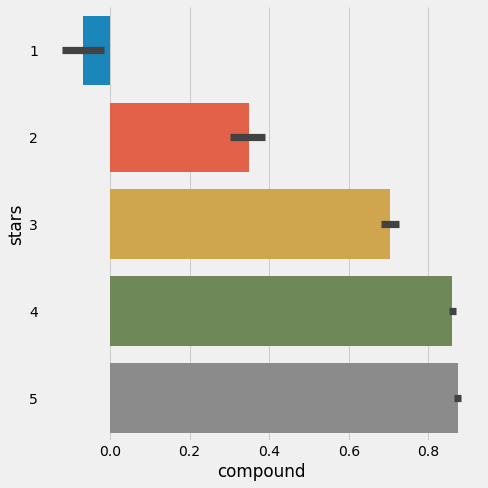

In [76]:
# looking at sentiment by Track we see this is overall positive
sns.catplot(x='compound', y='stars',  data=yelp, kind='bar',  estimator=np.mean, ci=95, height=7, orient='h') 

<Figure size 720x648 with 0 Axes>

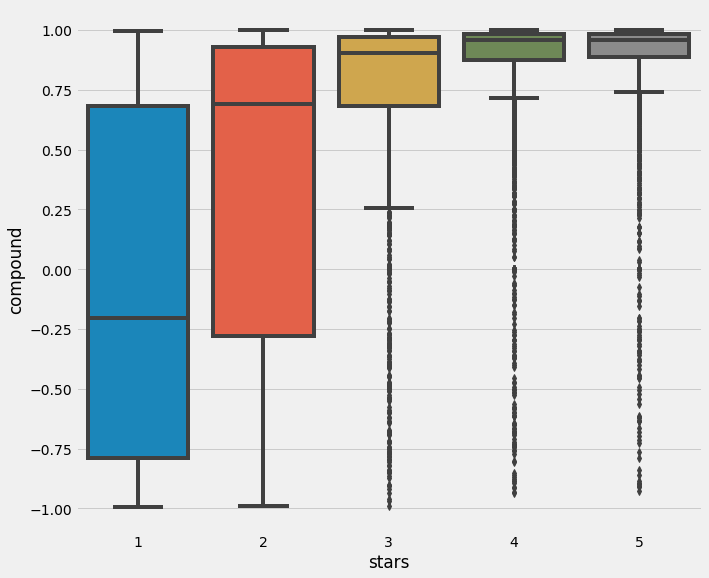

In [77]:
plt.figure(figsize=(10, 9))
sns.boxplot(x='stars', y='compound',data=yelp, orient='v')

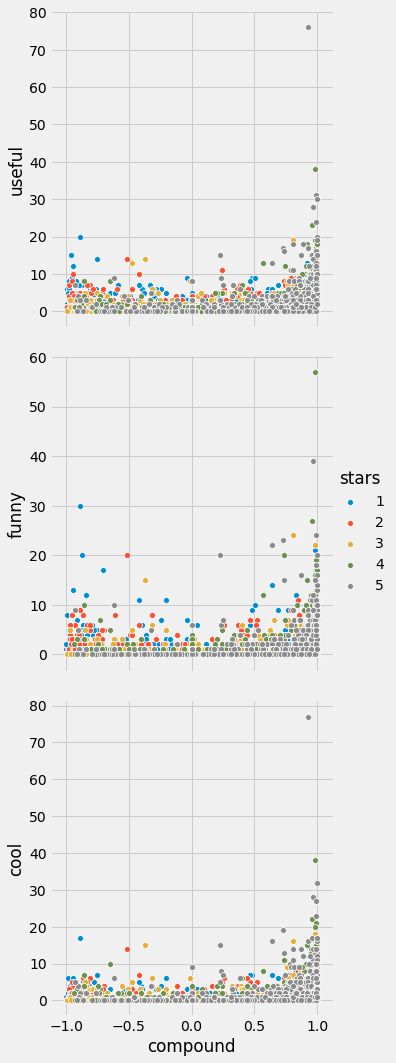

In [78]:
#plt.figure(figsize=(12, 10))
sns.pairplot(yelp, hue='stars', y_vars=['useful', 'funny', 'cool'], x_vars=['compound'], height=5)

In [79]:
# reviews with most positive sentiment, above guidance says anything over 0.05 but let's set it to the extreme positive case of anything over 0.8
yelp.loc[yelp['compound'] >= 0.8, ['text']].head(5)

,text
0,"My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.\r\n\r\nDo yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I've ever had. I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.\r\n\r\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best ""toast"" I've ever had.\r\n\r\nAnyway, I can't wait to go back!"
1,"I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\r\n\r\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we'll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small ""Here's The Beef"" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11"" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that's how I like my sauce!\r\n\r\nWe had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that you have to try these things yourself because all these bad reviewers have some serious issues."
2,love the gyro plate. Rice is so good and I also dig their candy selection :)
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!! It's very convenient and surrounded by a lot of paths, a desert xeriscape, baseball fields, ballparks, and a lake with ducks.\r\n\r\nThe Scottsdale Park and Rec Dept. does a wonderful job of keeping the park clean and shaded. You can find trash cans and poopy-pick up mitts located all over the park and paths.\r\n\r\nThe fenced in area is huge to let the dogs run, play, and sniff!"
4,"General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I'd be surprised if you don't walk out totally satisfied as I just did. Like I always say..... ""Mistakes are inevitable, it's how we recover from them that is important""!!!\r\n\r\nThanks to Scott and his awesome staff. You've got a customer for life!! .......... :^)"


In [80]:
# reviews with most positive sentiment, above guidance says anything below -0.05 but let's set it to the extreme positive case of anything over 0.8
yelp.loc[yelp['compound'] <= -0.8, ['text']].head(5)

,text
23,"U can go there n check the car out. If u wanna buy 1 there? That's wrong move! If u even want a car service from there? U made a biggest mistake of ur life!! I had 1 time asked my girlfriend to take my car there for an oil service, guess what? They ripped my girlfriend off by lying how bad my car is now. If without fixing the problem. Might bring some serious accident. Then she did what they said. 4 brand new tires, timing belt, 4 new brake pads. U know why's the worst? All of those above I had just changed 2 months before!!! What a trashy dealer is that? People, better off go somewhere!"
148,"Been here for many years but have seen a recent decline in quality service. Felt scolded by the bartender today at lunch. Felt disrespected as a customer. Service sucks stay away. ""bad service = bad review"""
239,"Where are the managers???? It took 1 1/2 hours for our meal to come out at 8:15 in the evening. Items came out at different times so we couldn't all eat at the same time. The asparagus tempura was inedible because they didn't cut the ends. Waitress just took it away and did not comp us. Waitress knew next to nothing about the sushi menu. She sat and talked with the hostess the entire time instead of waiting on her tables. Food was WAY over priced, and I couldn't speak to my dinner companions because the music was way to loud. One of the worst dining experiences in a long time. Paid $70 for a dinner for 4 and went home hungry. HORRIBLE!"
262,"OK, I've decided that other coffee shops sell swill. I think about Dazbog coffee in a dreamy sort of way, like unstressed people think about sex. I mourn often that they open so damn late in the morning. Seriously, I would be there every day... \r\n\r\nThe chocolate cappuccino rocks my world and perks me right the hell up, even on the mushiest afternoon. No bitterness, not overly sweet, just blissful- in an I've-just-been-bitch-slapped-by-caffeine sort of way, of course. \r\n\r\nOh, and the sandwiches I complained about? Replaced by real deli looking ones in clam-shells. Far more appetizing. But what the hell do I need a sandwich for when I can have a giant red velvet cupcake? \r\n\r\nDon't make me break out the voodoo, Dazbog. Just open at 6:00 am like any other coffee shop and we'll be BFFs."
283,"Was extremely psyched to try Lobby's, considering all of the great reviews, but I was sadly disappointed with the results. I'm a freak for Chili burgers (good ones are very difficult to find) and The Lobby's Chili burger was fairly dull, featured Cinci style Chili (BLAH) and like. some sort of cheese whiz kinda crap. Boo. Also ordered fries, and a Chicago dog.. the Chicago dog was overpriced and forgettable, and the crinkle cut fries were reminiscent of Del Taco's.. which isn't exactly a bad thing, but considering that Lobby's is supposed to be a tasty, quality burger place, frozen crinkle fries are kind of a half assed approach.. ALSO the amount of salt on the fries was enough to invoke a stroke! :x Finally whoever dude was that handed me my bag of food was all like ZIPPY DOO I GAVE YOU A CUP OF FRENCH FRY SAUCE.. There were two orders of fries.. one cup of sauce.. which was just basic secret sauce.. not super great... secret sauce, to boot.. Thanks bro, but I don't need any secret sauce favors."


## Let's look at some cases where the rating the sentiment don't add up

#### what's interesting here is that 5 stars with negative sentiment are somewhat ambiguous. It seems as if the negative sentiment expressed here is less about the businesses product i.e. the food and more about various feelings about the business operations. 

In [81]:
# negative sentiment in a 5-star review
yelp.loc[(yelp['stars'] == 5) & (yelp['compound'] < -0.7), ['text']].head(3)

,text
262,"OK, I've decided that other coffee shops sell swill. I think about Dazbog coffee in a dreamy sort of way, like unstressed people think about sex. I mourn often that they open so damn late in the morning. Seriously, I would be there every day... \r\n\r\nThe chocolate cappuccino rocks my world and perks me right the hell up, even on the mushiest afternoon. No bitterness, not overly sweet, just blissful- in an I've-just-been-bitch-slapped-by-caffeine sort of way, of course. \r\n\r\nOh, and the sandwiches I complained about? Replaced by real deli looking ones in clam-shells. Far more appetizing. But what the hell do I need a sandwich for when I can have a giant red velvet cupcake? \r\n\r\nDon't make me break out the voodoo, Dazbog. Just open at 6:00 am like any other coffee shop and we'll be BFFs."
390,"RIP AZ Coffee Connection. :( I stopped by two days ago unaware that they had closed. I am severely bummed. This place is irreplaceable! Damn you, Starbucks and McDonalds!"
660,"Video Paradise is great. For those who aren't financially comfortable enough for the monthly payment to maintain a NetFlix account, or when you don't feel like buying something from Amazon.com, Video Paradise is a wonderful substitute if you want to get something that you know won't be at Blockbuster or Hollywood Video.\r\n\r\nThe selection is staggering. I remember the first time I stepped in, I was amazed. The only movie I really wanted to see and they didn't have was The Helstrom Chronicle, but that's okay. I'm not going to ding this place because they didn't have it. ""You didn't have The Helstrom Chronicle? Lame!"" I mean, come on. No one else has it. \r\n\r\nThis place had it all, from little indie films to gross-out horror films I had long forgotten from my disturbing adolescence (Cannibal Holocaust, Faces of Death, etc.). They even had the worst movie I'd ever seen in my life: Hard Rock Zombies.\r\n\r\nThe décor is that of sheer, unbridled love for cinema. You can easily spend hours and hours browsing through their selection."


### conversely, for 1 star ratings with positive sentiment it looks like an issue with the sentiment model. 

In [82]:
# positive sentiment in a 1-star review
yelp.loc[(yelp['stars'] == 1) & (yelp['compound'] > 0.7), ['text']].head(3)

,text
31,Disgusting! Had a Groupon so my daughter and I tried it out. Very outdated and gaudy 80's style interior made me feel like I was in an episode of Sopranos. The food itself was pretty bad. We ordered pretty simple dishes but they just had no flavor at all! After trying it out I'm positive all the good reviews on here are employees or owners creating them.
35,"I've eaten here many times, but none as bad as last night.\r\nService was excellent, and highly attentive.\r\nFood, absolutely horrible.\r\n\r\nMy expectation was they would serve a steak on par with their seafood. After all, they were charging 39 bucks for a ribeye. \r\nWhat I was hoping for was a 1- 1-1/2' thick steak, cooked Pittsburgh style as I had ordered. \r\nWhat I got a a 3/4 in thick piece of meat that was mostly fat, gristle, and in no way resembled Pittsburgh Style. \r\nSalad, similar to something you could get at Chick Filet\r\nVeggies, blah.\r\nBread basket, ample, but day old, and if not, it certainly wasn't fresh. \r\n\r\nIn addition to bad food, we were crammed into a small room where we were nuts to butts with 6 other tables, listening to conversations ranging from someone's recent bout with pinkeye, and another couple who elected to speak entirely in French, until the waiter showed up, then it was like they turned off the French switch and suddenly began speaking English. \r\n\r\nI've had it with this place.\r\nIf I'm going to pay 150 bucks for dinner, it'll be at Mortons, or Maestro where the steaks are 1-1/2 in thick, cooked to perfection, and half of it doesnt wind up on the plate as fat and gristle"
61,"I have always been a fan of Burlington's deals, however I will not be shopping at this one again. I went to return a belt... pretty simple. Instead, I stood in the customer service line for 15 minutes thanks to an employee of Burlington buying/putting things on layaway. It took three other staff to help her out. There were no words said to me except ""Hold on"". I was pissed. When the lady was finally done, the employee at the service asked ""what do you want?"" Serious help is needed there!\r\n If you work in the area of ""customer service"" I think you should have some."


## Topic Modeling

### Let's try another approach to analyzing this text with Topic Modeling or thematic analysis as I like to call it
### Topic Modeling is a way to organically or in an unsupervised fashion identify topics within text. The benefit of doing a bottom up approach is that topics can emerge naturally without bias. The downside is that occassionally topics are not interpretable, particularly if topics are not well differentiated. For example, AI may be thought of a superset of Machine Learning topics and as such text data dealing with these broad topics might not emerge as two distinct topics. 

### This analysis used Latent Dirichlet Allocation (LDA) to identify topics. LDA is a Bayesian model which assumes that bag-of-words represent a distribution of topics and these topics represent a distribution of documents, and these documents can have multiple topics. 


### We will prep the text like we did before using TF-IDF and then visualize the topics

### Use TFIDF to create trigrams for topics

### TFIDF
- **What:** Computes "relative frequency" that a word appears in a document compared to its frequency across all documents
- **Why:** More useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents)
- **Notes:** Used for search engine scoring, text summarization, document clustering

### Topic Modeling

<!-- #### Topic modeling is an unsupervised ML approach to identifying the topics that best represent a set of documents. This analysis used Latent Dirichlet Allocation (LDA) to identify topics. LDA is a Bayesian model which assumes that bag-of-words represent a distribution of topics and these topics represent a distribution of documents, and these documents can have multiple topics.  -->

In [83]:
tfidf = TfidfVectorizer(analyzer='word', min_df=2, max_df=0.9, lowercase=True, ngram_range=(2,4), smooth_idf=True, stop_words='english', use_idf=True)
tfidfvect = tfidf.fit_transform(yelp['text'])

In [89]:
yelp['text'].count()

10000

In [94]:
topics = 5

In [95]:
# Latent Dirichlet Allocation Model
lda = LatentDirichletAllocation(n_components=topics, max_iter=150, learning_method='online',verbose=False)
data_lda = lda.fit_transform(tfidfvect)

In [96]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=15):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]]) 

In [97]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("Latent Dirichlet Allocation Model:")
selected_topics(lda, tfidf)

Latent Dirichlet Allocation Model:
Topic 0:
[('happy hour', 50.027356273212284), ('food good', 38.48006754772524), ('really good', 37.766384015955914), ('good food', 35.26560790623258), ('great place', 34.451813731008286), ('pretty good', 32.111488770303716), ('great food', 31.060383248263108), ('love place', 30.733309658905302), ('service great', 29.472628279602908), ('don know', 26.650594153074216), ('mexican food', 25.619423599312675), ('food great', 24.58001305099012), ('good service', 24.548393809965326), ('ice cream', 23.953592397823584), ('highly recommend', 22.89419533341599)]
Topic 1:
[('fro yo', 4.850610179556122), ('light bulbs', 2.0010650878550837), ('quality great', 1.7363761156097042), ('imax theater', 1.6914632189609737), ('love guys', 1.6904731566089701), ('hope opens', 1.627912796880454), ('breakfast included', 1.600867589480039), ('love starbucks', 1.5978920645314285), ('excellent burger', 1.5941297346689571), ('prefer place', 1.4344594550334935), ('best outside', 1.3

### Code below visulizes topics. 
- reference: https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf 
- reference for sensitivity metric: https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf 

Here we use  principle coordinate analysis (pcoa) for distance map, using pcoa tends to show closer separation, but also more overlap. It's a better representation of how far apart the topics actually are whereas using tsne forces topics to not overlap but can be less intuitive given when topics tend be similar. 

In [92]:
pyLDAvis.__version__

'2.1.2'

#### Relevance (the sliding scale) lets users specify a range between the probability that a term belongs to a specific topic and it's overall probabilistic occurence in the corpus  

Taddy (2011) uses an intrinsic measure to rank terms within topics: a quantity called lift, defined as the ratio of a term’s probability
within a topic to its marginal probability across the corpus. This generally decreases the rankings of globally frequent terms, which can be helpful.
We find that it can be noisy, however, by giving high rankings to very rare terms that occur in only a single topic, for instance. While such terms may contain useful topical content, if they are very rare the topic may remain difficult to interpret. 

We propose a similar method that is a weighted average of the logarithms of a term’s probability and its lift, and we justify it with a user study and incorporate it into our interactive visualization.

reference: https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf

In [98]:
pyLDAvis.enable_notebook()
#pyLDAvis.save_html(dash, "lda")
dash = pyLDAvis.sklearn.prepare(lda, tfidfvect, tfidf, R=30, mds='pcoa') #tsne, pcoa #R = number of terms to visualize
dash

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=                          x                     y  topics  cluster  \
topic                                                                
0     0.056262964772856784  0.004151116460628491   1       1         
3     -0.044780706976294986 0.006142116844459544   2       1         
1     -0.004048200798203222 -0.006523195442817862  3       1         
4     -0.003999550121348082 -0.003785178376995962  4       1         
2     -0.003434506877010463 0.000015140514725817   5       1         

                       Freq  
topic                        
0     75.724637895239865770  
3     12.488497822427159889  
1     4.008949310540467437   
4     3.981388038295106124   
2     3.796526933497388345   , topic_info=      Category                  Freq              Term                 Total  \
26571  Default 17.000000000000000000  great service    17.000000000000000000   
12699  Default 17.000000000000000000  customer service 17.000000000000000000   
8135   Default 8.000000000000000000   carne asada      8.000000000000000000    
10542  Default 4.000000000000000000   coffee shop      4.000000000000000000    
58562  Default 15.000000000000000000  staff friendly   15.000000000000000000   
...        ...                   ...             ...                     ...   
8135   Topic5  0.319180854202568920   carne asada      8.764379515282650246    
26544  Topic5  0.183214415915440298   great sandwich   1.328556694320343956    
11169  Topic5  0.148549352354142905   complaints place 0.665402188206818512    
53633  Topic5  0.141914791088948083   sandwiches huge  0.636494595280166497    
8652   Topic5  0.142984401738642269   cheap delicious  1.059405811085799787    

                    loglift               logprob  
26571 40.000000000000000000 40.000000000000000000  
12699 39.000000000000000000 39.000000000000000000  
8135  38.000000000000000000 38.000000000000000000  
10542 37.000000000000000000 37.000000000000000000  
58562 36.000000000000000000 36.000000000000000000  
...                     ...                   ...  
8135  -0.041599999999999998 -8.628999999999999559  
26544 1.289900000000000047  -9.184100000000000819  
11169 1.771600000000000064  -9.393800000000000594  
53633 1.770299999999999985  -9.439500000000000668  
8652  1.268399999999999972  -9.432000000000000384  

[338 rows x 6 columns], token_table=       Topic                 Freq              Term
term                                               
97     1     0.954783030624951512  10 minutes      
1278   1     0.628743285871105395  air conditioning
3493   2     1.094191498251909422  bag beans       
4839   2     1.011639003089179756  best donuts     
4872   1     1.175176388830671437  best gelato     
...   ..                      ...          ...     
69280  2     0.882973406536111227  wide selection  
70161  1     0.784645335307616265  worth drive     
70161  2     0.261548445102538774  worth drive     
70507  1     0.901915660440707478  year old        
70507  2     0.150319276740117913  year old        

[183 rows x 3 columns], R=40, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 5, 3])

In [102]:
# Latent Dirichlet Allocation Model
lda2 = LatentDirichletAllocation(n_components=2, max_iter=150, learning_method='online',verbose=False)
data_lda2 = lda2.fit_transform(tfidfvect)

In [103]:
# Keywords for topics clustered by Latent Dirichlet Allocation
print("Latent Dirichlet Allocation Model:")
selected_topics(lda2, tfidf)

Latent Dirichlet Allocation Model:
Topic 0:
[('really good', 35.818323672407956), ('great food', 33.605405303283554), ('great service', 29.980590524611074), ('ice cream', 29.672045039509406), ('pretty good', 29.095964110870316), ('food great', 28.1398083815067), ('service great', 27.58786387888918), ('love place', 26.19566598841481), ('good food', 24.78894953571095), ('food good', 23.809342014108996), ('customer service', 20.892158708348088), ('don know', 20.33276429279908), ('food service', 20.290008045984465), ('mexican food', 19.990786768345515), ('service good', 18.85177882249457)]
Topic 1:
[('happy hour', 36.45369383688627), ('great place', 22.586902325596032), ('friendly staff', 18.45247635634069), ('staff friendly', 17.310284469966206), ('love love', 16.050404495756325), ('food good', 15.471800565327129), ('highly recommend', 13.349269385859655), ('love place', 12.588923871850065), ('friendly helpful', 12.451748126044398), ('feel like', 12.032945515358755), ('parking lot', 12.00

In [104]:
dash1 = pyLDAvis.sklearn.prepare(lda2, tfidfvect, tfidf, R=40, mds='pcoa') #tsne, pcoa #R = number of terms to visualize
dash1

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=                          x                    y  topics  cluster  \
topic                                                               
0     0.022086668458595641  0.000000000000000000  1       1         
1     -0.022086668458595641 0.000000000000000000  2       1         

                       Freq  
topic                        
0     66.156921093262781142  
1     33.843078906737211753  , topic_info=      Category                  Freq            Term                 Total  \
27619  Default 19.000000000000000000  happy hour     19.000000000000000000   
36503  Default 5.000000000000000000   love love      5.000000000000000000    
22716  Default 7.000000000000000000   friendly staff 7.000000000000000000    
29864  Default 13.000000000000000000  ice cream      13.000000000000000000   
21114  Default 13.000000000000000000  food great     13.000000000000000000   
...        ...                   ...         ...                       ...   
15989  Topic2  2.814885726629470675   don know       12.189050506101715143   
46241  Topic2  2.472972374727241629   place great    9.112146522897354828    
48196  Topic2  2.540713273167162889   pretty good    15.955040910334748361   
25251  Topic2  2.218002912925185477   good time      5.410111228085096258    
37392  Topic2  2.197920774047470438   make sure      9.225573391345665897    

                    loglift               logprob  
27619 40.000000000000000000 40.000000000000000000  
36503 39.000000000000000000 39.000000000000000000  
22716 38.000000000000000000 38.000000000000000000  
29864 37.000000000000000000 37.000000000000000000  
21114 36.000000000000000000 36.000000000000000000  
...                     ...                   ...  
15989 -0.382199999999999984 -8.639699999999999491  
46241 -0.220799999999999996 -8.769199999999999662  
48196 -0.753900000000000015 -8.742200000000000415  
25251 0.191799999999999998  -8.878000000000000114  
37392 -0.350999999999999979 -8.887100000000000222  

[197 rows x 6 columns], token_table=       Topic                 Freq              Term
term                                               
97     1     0.946717664666719028  10 minutes      
3100   1     0.292467319878305210  awesome food    
3100   2     0.584934639756610419  awesome food    
4962   1     0.976002584398264927  best pizza      
5072   1     0.867330908451312665  best ve         
...   ..                      ...         ...      
67583  1     0.310252725092795167  walking distance
67583  2     0.620505450185590335  walking distance
68916  2     0.609963079736089653  went finally    
70507  1     0.430592028702846630  year old        
70507  2     0.430592028702846630  year old        

[196 rows x 3 columns], R=40, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## Adding Features to a Document-Term Matrix

In [49]:
# create a DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# define X and y
feature_cols = ['text', 'sentiment', 'cool', 'useful', 'funny']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [50]:
# use CountVectorizer with text column only
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train.text)
X_test_dtm = vect.transform(X_test.text)
print X_train_dtm.shape
print X_test_dtm.shape

(3064, 16825)
(1022, 16825)


In [51]:
# shape of other four feature columns
X_train.drop('text', axis=1).shape

(3064, 4)

In [52]:
# cast other feature columns to float and convert to a sparse matrix
extra = sp.sparse.csr_matrix(X_train.drop('text', axis=1).astype(float))
extra.shape

(3064, 4)

In [53]:
# combine sparse matrices
X_train_dtm_extra = sp.sparse.hstack((X_train_dtm, extra))
X_train_dtm_extra.shape

(3064, 16829)

In [54]:
# repeat for testing set
extra = sp.sparse.csr_matrix(X_test.drop('text', axis=1).astype(float))
X_test_dtm_extra = sp.sparse.hstack((X_test_dtm, extra))
X_test_dtm_extra.shape

(1022, 16829)

In [55]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm, y_train)
y_pred_class = logreg.predict(X_test_dtm)
print metrics.accuracy_score(y_test, y_pred_class)

0.917808219178


In [56]:
# use logistic regression with all features
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train_dtm_extra, y_train)
y_pred_class = logreg.predict(X_test_dtm_extra)
print metrics.accuracy_score(y_test, y_pred_class)

0.922700587084


## Conclusion

- NLP is a gigantic field
- Understanding the basics broadens the types of data you can work with
- Simple techniques go a long way
- Use scikit-learn for NLP whenever possible